# Environment Setup

In [1]:
!pip install pycaret -q

     |████████████████████████████████| 266 kB 3.5 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 271 kB 43.7 MB/s 
     |████████████████████████████████| 1.3 MB 57.1 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 2.0 MB 56.5 MB/s 
     |████████████████████████████████| 14.6 MB 272 kB/s 
     |████████████████████████████████| 261 kB 74.2 MB/s 
     |████████████████████████████████| 1.7 MB 74.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 111 kB 60.3 MB/s 
     |████████████████████████████████| 167 kB 53.7 MB/s 
     |████████████████████████████████| 6.8 MB 38.0 MB/s 
     |████████████████████████████████| 102 kB 10.4 MB/s 
     |████████████████████████████████| 62 kB 846 kB/s 
     |████████████████████

In [2]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     \ 34.6 MB 1.1 MB/s
     |████████████████████████████████| 4.7 MB 8.3 MB/s 


In [3]:
import numpy as np
import pandas as pd

from pycaret.classification import *
from pandas_profiling import ProfileReport
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [4]:
# running this fixed the plots not displaying
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
plt.close('all')

In [5]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [6]:
#profile = ProfileReport(dataset, title="Heart Dataset", html={'style': {'full_width': True}})
#profile.to_notebook_iframe()
#profile.to_file(output_file="Heart_UCI_Profile.html")

# Data Import/Setup

In [7]:
df_path = 'gdrive/My Drive/Colab Notebooks/heart_cleveland_upload.csv'  #change dir to your project folder
dataset = pd.read_csv(df_path)
dataset.shape

(297, 14)

In [36]:
data = dataset.sample(frac=0.90, random_state=54321)
data_unseen = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (267, 14)
Unseen Data For Predictions (30, 14)


In [37]:
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,62,0,3,150,244,0,0,154,1,1.4,1,0,0,1


In [38]:
data.drop('fbs', axis=1, inplace=True)
data.head(1)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,62,0,3,150,244,0,154,1,1.4,1,0,0,1


Notes for Setup:<br>
Need explanations for parameter settings:<br>
pca:<br>
pca_components:<br>
normalize:<br>
transofrmation:<br>
remove_multicollinearity:<br>
multicollinearity_threshold:<br>
bin_numeric_features:<br>
<br>
OTHERS as they are changed

In [39]:
exp_clf102 = setup(
      data = data, 
      target = 'condition', 
#     feature_selection = True,
#     feature_selection_threshold = .5,
      pca = True, 
      pca_components = .999, 
      combine_rare_levels = True, 
      rare_level_threshold = 0.05,

      normalize = True, 
      transformation = True, 
      remove_multicollinearity = True, 
      multicollinearity_threshold = 0.70,
      bin_numeric_features = ['age'],
      #profile=True,
      silent=True,
      train_size = 0.9,
      log_experiment = True,
      experiment_name = 'P1_Heart',
      session_id=123)

,Description,Value
0,session_id,123
1,Target,condition
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(267, 13)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


# Compare models

In [40]:
#Compare models common parameters 
NUM_FOLDS = 10
OPTIMIZE_FOR = 'Recall'

In [41]:
top3 = compare_models(fold=NUM_FOLDS,n_select=3,sort=OPTIMIZE_FOR)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8167,0.9070,0.7727,0.8266,0.7905,0.6287,0.6401,0.023
ridge,Ridge Classifier,0.8292,0.0000,0.7636,0.8585,0.7996,0.6526,0.6662,0.015
lightgbm,Light Gradient Boosting Machine,0.8125,0.8769,0.7636,0.8223,0.7865,0.6203,0.6280,0.044
dt,Decision Tree Classifier,0.7667,0.7650,0.7455,0.7503,0.7400,0.5293,0.5381,0.018
svm,SVM - Linear Kernel,0.7875,0.0000,0.7455,0.7961,0.7625,0.5709,0.5803,0.018
gbc,Gradient Boosting Classifier,0.8042,0.8755,0.7455,0.8204,0.7741,0.6027,0.6122,0.165
rf,Random Forest Classifier,0.8083,0.8829,0.7364,0.8327,0.7780,0.6107,0.6181,0.510
lda,Linear Discriminant Analysis,0.8167,0.8888,0.7364,0.8501,0.7836,0.6267,0.6372,0.016
et,Extra Trees Classifier,0.8000,0.8895,0.7364,0.8129,0.7706,0.5943,0.5986,0.462
ada,Ada Boost Classifier,0.7750,0.8392,0.7000,0.7889,0.7381,0.5427,0.5491,0.113


# Model 1

In [42]:
model1 = top3[0]
print(model1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [43]:
evaluate_model(model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [44]:
tuned_model1=tune_model(model1, optimize=OPTIMIZE_FOR,fold=NUM_FOLDS)
print(tuned_model1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7917,0.8951,0.9091,0.7143,0.8000,0.5890,0.6078
1,0.8333,0.9441,0.7273,0.8889,0.8000,0.6596,0.6693
2,0.8750,0.9650,0.8182,0.9000,0.8571,0.7465,0.7492
3,0.7083,0.7832,0.5455,0.7500,0.6316,0.4000,0.4139
4,0.8750,0.8811,0.8182,0.9000,0.8571,0.7465,0.7492
5,0.8333,0.8531,0.6364,1.0000,0.7778,0.6547,0.6976
6,0.7500,0.8462,0.8182,0.6923,0.7500,0.5034,0.5105
7,0.9167,1.0000,1.0000,0.8462,0.9167,0.8345,0.8462
8,0.7083,0.8322,0.7273,0.6667,0.6957,0.4167,0.4181
9,0.7917,0.9441,1.0000,0.6875,0.8148,0.5946,0.6504


LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [45]:
evaluate_model(tuned_model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

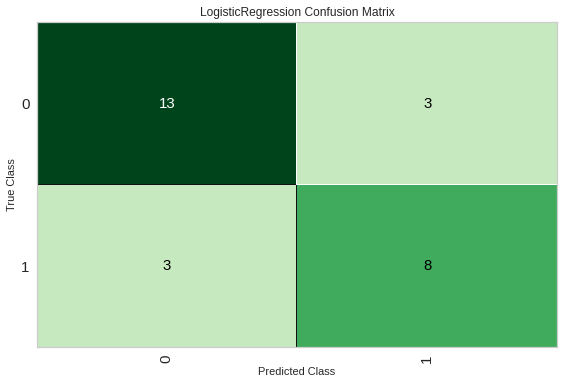

In [46]:
plot_model(tuned_model1, plot='confusion_matrix')

In [47]:
calibrated_model1 = calibrate_model(tuned_model1)
evaluate_model(calibrated_model1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.8951,0.8182,0.8182,0.8182,0.6643,0.6643
1,0.7917,0.9441,0.6364,0.8750,0.7368,0.5714,0.5913
2,0.8750,0.9720,0.8182,0.9000,0.8571,0.7465,0.7492
3,0.7500,0.7832,0.5455,0.8571,0.6667,0.4820,0.5136
4,0.8333,0.8881,0.7273,0.8889,0.8000,0.6596,0.6693
5,0.7917,0.8531,0.5455,1.0000,0.7059,0.5652,0.6276
6,0.7917,0.8531,0.8182,0.7500,0.7826,0.5833,0.5854
7,0.9583,1.0000,0.9091,1.0000,0.9524,0.9155,0.9188
8,0.7500,0.8252,0.7273,0.7273,0.7273,0.4965,0.4965
9,0.7917,0.9441,0.8182,0.7500,0.7826,0.5833,0.5854


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

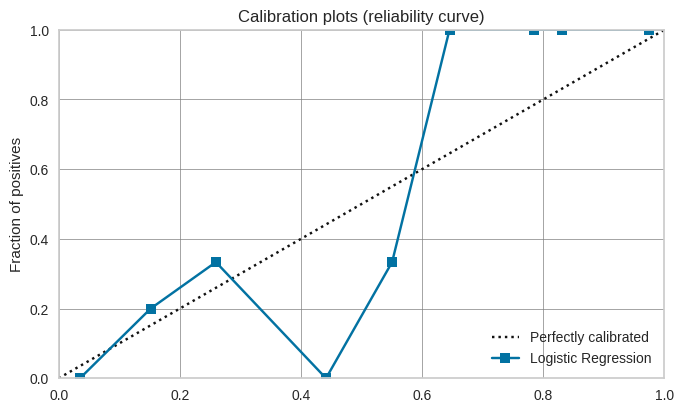

In [48]:
plot_model(calibrated_model1,plot='calibration')

In [49]:
bagged_model1 = ensemble_model(calibrated_model1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9167,0.9231,0.9091,0.9091,0.9091,0.8322,0.8322
1,0.7917,0.9371,0.6364,0.8750,0.7368,0.5714,0.5913
2,0.8750,0.9720,0.8182,0.9000,0.8571,0.7465,0.7492
3,0.7917,0.7762,0.5455,1.0000,0.7059,0.5652,0.6276
4,0.7917,0.9021,0.6364,0.8750,0.7368,0.5714,0.5913
5,0.7917,0.8671,0.5455,1.0000,0.7059,0.5652,0.6276
6,0.7500,0.8322,0.7273,0.7273,0.7273,0.4965,0.4965
7,0.9583,0.9930,0.9091,1.0000,0.9524,0.9155,0.9188
8,0.7500,0.8392,0.6364,0.7778,0.7000,0.4894,0.4966
9,0.8750,0.9720,0.8182,0.9000,0.8571,0.7465,0.7492


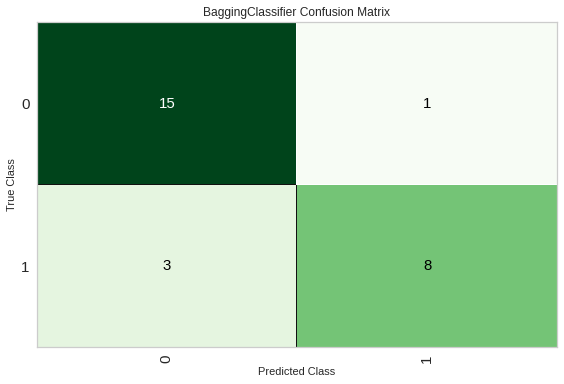

In [50]:
plot_model(bagged_model1, plot='confusion_matrix')

In [51]:
boosted_model1 = ensemble_model(model1,method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.9301,0.8182,0.8182,0.8182,0.6643,0.6643
1,0.8333,0.9510,0.7273,0.8889,0.8000,0.6596,0.6693
2,0.8750,0.9510,0.8182,0.9000,0.8571,0.7465,0.7492
3,0.7917,0.8322,0.5455,1.0000,0.7059,0.5652,0.6276
4,0.8333,0.8671,0.7273,0.8889,0.8000,0.6596,0.6693
5,0.7917,0.8392,0.6364,0.8750,0.7368,0.5714,0.5913
6,0.7917,0.8811,0.8182,0.7500,0.7826,0.5833,0.5854
7,0.9583,0.9860,0.9091,1.0000,0.9524,0.9155,0.9188
8,0.7500,0.8462,0.7273,0.7273,0.7273,0.4965,0.4965
9,0.8333,0.9371,0.8182,0.8182,0.8182,0.6643,0.6643


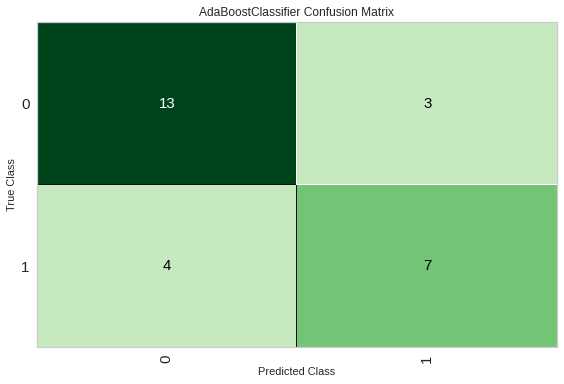

In [52]:
plot_model(boosted_model1, plot='confusion_matrix')

In [53]:
predict_model(calibrated_model1)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8148,0.8807,0.7273,0.8,0.7619,0.611,0.6128


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16,Component_17,Component_18,Component_19,Component_20,Component_21,Component_22,Component_23,Component_24,Component_25,Component_26,condition,Label,Score
0,2.231109,-0.890757,1.406895,-1.846882,-0.113532,0.116297,0.003350,0.472788,-0.159254,0.426565,0.606971,1.024423,-0.355439,0.072212,-0.016149,0.040573,-0.189126,0.396626,-0.378246,-0.337960,0.255682,-0.360111,0.541571,-0.206622,-0.114863,0.067483,1,1,0.9180
1,-0.989665,-0.090484,-1.665689,-0.426659,-0.799937,0.380326,0.538122,0.084209,-0.505809,0.188295,-0.275845,-0.420705,-0.256427,0.344378,-0.638850,0.452071,-0.130556,-0.158243,-0.598463,0.147717,0.121567,-0.010920,-0.001292,-0.114384,-0.043653,-0.015339,1,1,0.6131
2,1.718718,-0.038083,0.678967,-0.098377,1.672921,-0.423275,0.026063,-0.045283,0.301671,0.592242,0.388327,-0.175948,-0.143046,0.800264,0.106542,-0.432464,0.611728,-0.311944,0.062193,0.531491,0.760361,0.038086,-0.552301,-0.145505,-0.070581,0.040356,0,0,0.8018
3,-0.262440,-1.883423,-1.150561,1.009341,0.855057,0.111530,-0.453633,-0.292754,0.011625,-0.420412,-0.504392,-0.142612,0.242172,0.120740,0.620513,0.456081,0.343790,0.461437,0.272885,-0.222036,-0.144048,-0.089834,0.030469,0.089199,0.006003,-0.030274,0,0,0.8245
4,2.759612,-0.810716,0.594771,0.349677,0.253905,-0.555662,-0.932552,0.130471,0.730809,-0.078368,-0.367259,0.001875,-0.330241,0.011919,-0.136084,0.131279,0.034754,-0.136497,0.168095,-0.162075,0.549336,0.185951,-0.426584,-0.018027,-0.050182,0.075239,1,1,0.7956
5,-1.838604,-2.410778,1.093304,0.929289,0.674003,0.007587,0.341213,0.236333,0.263053,-0.592214,0.704223,-0.146106,0.255832,0.141962,0.074514,0.774726,-0.139741,-0.405399,-0.219032,0.324155,-0.175171,-0.203693,-0.157721,0.010181,-0.021804,0.027620,0,0,0.9191
6,-1.115549,0.406608,0.407193,0.640600,0.286372,-0.259037,0.354322,0.869855,0.121691,0.606784,0.319185,-0.291021,0.526299,0.081629,0.237851,0.618677,-0.417930,-0.447633,-0.261055,0.152493,-0.202299,-0.161856,-0.089952,-0.005734,-0.061684,0.005252,0,0,0.8351
7,-1.543482,1.194079,0.430591,0.047926,-0.895292,-0.696630,0.225424,0.202869,-0.691508,-0.598116,-0.985931,-0.126456,0.158972,0.224300,0.429127,0.282431,0.251522,0.339686,0.185247,-0.229645,-0.051302,-0.029970,0.051979,0.250346,0.036311,-0.052280,0,0,0.7466
8,1.578291,-0.368522,-0.844767,-0.725872,1.090761,0.852398,0.219720,-0.848490,0.312430,-0.023437,0.599694,-0.242154,0.668223,-0.678712,-0.385610,-0.192698,0.173454,-0.244614,-0.358645,-0.066509,0.020157,-0.023712,-0.050564,-0.271813,-0.035032,0.014378,1,1,0.7335
9,-2.153310,-1.403430,-0.484839,-0.004687,-0.299214,0.467516,0.783070,-0.215512,0.898802,0.308876,0.115735,-0.491475,0.444371,0.145795,0.124101,-0.745570,-0.666474,0.056588,-0.115264,0.199760,0.164819,-0.153758,-0.171626,-0.066126,-0.055331,-0.041902,0,0,0.8632


In [54]:
results_model1 = predict_model(bagged_model1, data=data_unseen)
display(results_model1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,Label,Score
0,59,1,0,170,288,0,2,159,0,0.2,1,0,2,1,0,0.5674
1,66,1,1,160,246,0,0,120,1,0.0,1,3,1,1,1,0.6606
2,59,1,1,140,221,0,0,164,1,0.0,0,0,0,0,0,0.7560
3,56,1,1,120,236,0,0,178,0,0.8,0,0,0,0,0,0.8495
4,68,1,2,118,277,0,0,151,0,1.0,0,1,2,0,0,0.5896
5,67,0,2,152,277,0,0,172,0,0.0,0,1,0,0,0,0.8108
6,66,0,2,146,278,0,2,152,0,0.0,1,1,0,0,0,0.6909
7,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1,1,0.5920
8,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1,1,0.5818
9,50,1,2,129,196,0,0,163,0,0.0,0,0,0,0,0,0.8899


In [55]:
holdout_score=pull()
display(holdout_score)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8148,0.8807,0.7273,0.8,0.7619,0.611,0.6128


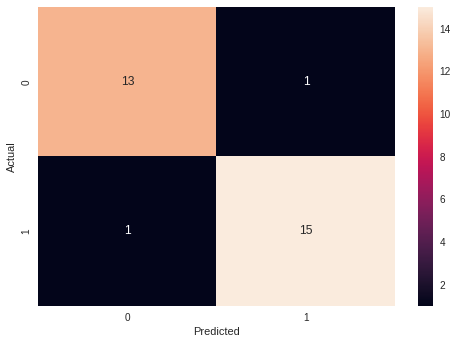

In [56]:
confusion_matrix_m1 = pd.crosstab(results_model1['condition'], results_model1['Label'], rownames=['Actual'],colnames=['Predicted'])  #, margins=True)
sns.heatmap(confusion_matrix_m1, annot=True)
plt.show()

# Blend Models

In [57]:
blend_soft = blend_models(estimator_list = [top3[0], top3[1], top3[2]])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.0,0.9091,0.7692,0.8333,0.6690,0.6783
1,0.7917,0.0,0.6364,0.8750,0.7368,0.5714,0.5913
2,0.8750,0.0,0.8182,0.9000,0.8571,0.7465,0.7492
3,0.7083,0.0,0.5455,0.7500,0.6316,0.4000,0.4139
4,0.8333,0.0,0.7273,0.8889,0.8000,0.6596,0.6693
5,0.7917,0.0,0.6364,0.8750,0.7368,0.5714,0.5913
6,0.7917,0.0,0.8182,0.7500,0.7826,0.5833,0.5854
7,0.9583,0.0,0.9091,1.0000,0.9524,0.9155,0.9188
8,0.7917,0.0,0.7273,0.8000,0.7619,0.5775,0.5795
9,0.8750,0.0,1.0000,0.7857,0.8800,0.7534,0.7774


In [58]:
evaluate_model(blend_soft)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [59]:
predict_model(blend_soft, data=data_unseen)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,Label
0,59,1,0,170,288,0,2,159,0,0.2,1,0,2,1,0
1,66,1,1,160,246,0,0,120,1,0.0,1,3,1,1,1
2,59,1,1,140,221,0,0,164,1,0.0,0,0,0,0,0
3,56,1,1,120,236,0,0,178,0,0.8,0,0,0,0,0
4,68,1,2,118,277,0,0,151,0,1.0,0,1,2,0,0
5,67,0,2,152,277,0,0,172,0,0.0,0,1,0,0,0
6,66,0,2,146,278,0,2,152,0,0.0,1,1,0,0,0
7,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1,1
8,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1,1
9,50,1,2,129,196,0,0,163,0,0.0,0,0,0,0,0


In [60]:
blend_hard = blend_models(estimator_list = [top3[0], top3[1], top3[2]], method='hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.0,0.9091,0.7692,0.8333,0.6690,0.6783
1,0.7917,0.0,0.6364,0.8750,0.7368,0.5714,0.5913
2,0.8750,0.0,0.8182,0.9000,0.8571,0.7465,0.7492
3,0.7083,0.0,0.5455,0.7500,0.6316,0.4000,0.4139
4,0.8333,0.0,0.7273,0.8889,0.8000,0.6596,0.6693
5,0.7917,0.0,0.6364,0.8750,0.7368,0.5714,0.5913
6,0.7917,0.0,0.8182,0.7500,0.7826,0.5833,0.5854
7,0.9583,0.0,0.9091,1.0000,0.9524,0.9155,0.9188
8,0.7917,0.0,0.7273,0.8000,0.7619,0.5775,0.5795
9,0.8750,0.0,1.0000,0.7857,0.8800,0.7534,0.7774


In [61]:
evaluate_model(blend_hard)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [62]:
results_blendhard = predict_model(blend_hard, data=data_unseen)
display(results_blendhard)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,Label
0,59,1,0,170,288,0,2,159,0,0.2,1,0,2,1,0
1,66,1,1,160,246,0,0,120,1,0.0,1,3,1,1,1
2,59,1,1,140,221,0,0,164,1,0.0,0,0,0,0,0
3,56,1,1,120,236,0,0,178,0,0.8,0,0,0,0,0
4,68,1,2,118,277,0,0,151,0,1.0,0,1,2,0,0
5,67,0,2,152,277,0,0,172,0,0.0,0,1,0,0,0
6,66,0,2,146,278,0,2,152,0,0.0,1,1,0,0,0
7,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1,1
8,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1,1
9,50,1,2,129,196,0,0,163,0,0.0,0,0,0,0,0


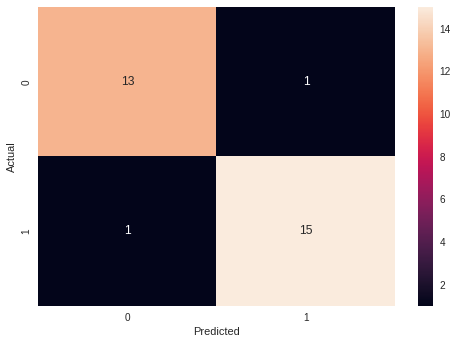

In [63]:
confusion_matrix_bh = pd.crosstab(results_blendhard['condition'], results_blendhard['Label'], rownames=['Actual'],colnames=['Predicted'])  #, margins=True)
sns.heatmap(confusion_matrix_bh, annot=True)
plt.show()